# Ecological Analysis of Accelerator-VC Bipartite Networks

Analysis of the French accelerator-VC network using ecological metrics inspired by Carniel's work on complex networks in entrepreneurial ecosystems.

**Focus**: Nestedness, Modularity, Connectance, and network resilience patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from utils.data_cleaning import *
from utils.data_extraction import *
from utils.network_analysis import *

plt.style.use('default')
sns.set_palette('husl')

## Data Loading and Preparation

Load and clean French startup ecosystem data using enhanced techniques.

In [ ]:
raw_data = load_data('data/france')
# Load data
companies = raw_data['companies']
investors = raw_data['investors']
investments = raw_data['investments']
funding_rounds = raw_data['funding_rounds']

print(f"Companies: {len(companies):,}")
print(f"Investors: {len(investors):,}")
print(f"Investments: {len(investments):,}")
print(f"Funding rounds: {len(funding_rounds):,}")

Companies: 56,797
Investors: 4,564
Investments: 23,420
Funding rounds: 14,375


In [3]:
# Data cleaning based on Dalle et al. + Carniel insights
cleaned_data = create_final_sample(raw_data, funding_threshold=150000)

companies_clean = cleaned_data['companies']
investors_clean = cleaned_data['investors']
investments_clean = cleaned_data['investments']
funding_rounds_clean = cleaned_data['funding_rounds']

print(f"After cleaning:")
print(f"Companies: {len(companies_clean):,}")
print(f"Investors: {len(investors_clean):,}")


1. Cleaning companies data
Initial companies count: 56797
Removed 9151 companies founded after 2017
Removed 4231 companies with exit status
Final companies count after cleaning: 43415
Total removed: 13382

2. Cleaning funding data
Initial investments count: 23420
Removed 2533 investments with invalid funding amounts
Final investments count after cleaning: 20887
Total removed: 2533

3. Apply funding threshold ($150,000 as per paper)
Applying funding threshold of $150,000
Companies meeting funding threshold: 4854
Filtered companies: 2415
Filtered investments: 20650

4. Excluding accelerator-only companies (prevent endogeneity bias)
Companies with accelerator-only funding: 116
Companies after excluding accelerator-only: 2361
Investments after excluding accelerator-only: 20505

FINAL SAMPLE:
Companies: 2361
Investments: 10163
Unique investors: 2343
After cleaning:
Companies: 2,361
Investors: 4,564


## Accelerator-VC Network Construction

Build bipartite network following the methodology from 07_19.ipynb but with ecological focus.

In [4]:
accelerated_investments = extract_accelerator_investments(cleaned_data['investments'])

print("\nSample of accelerator investments:")
if 'company_name' in accelerated_investments.columns:
    display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
    print(accelerated_investments[display_cols].head())
else:
    print(accelerated_investments[['org_uuid', 'investor_name', 'investor_types']].head())
    
vc_investments = extract_vc_investments(cleaned_data['investments'])

print("\nSample of VC investments:")
if 'company_name' in vc_investments.columns:
    display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
    print(vc_investments[display_cols].head())
else:
    print(vc_investments[['org_uuid', 'investor_name', 'investor_types']].head())
    
print("\nAccelerator-VC pairs:")
accelerator_vc_pairs = create_investment_pairs(accelerated_investments, vc_investments, 'acc', 'vc')
print(accelerator_vc_pairs[['org_uuid', 'investor_name_acc', 'investor_name_vc']].head())

Found 675 accelerator investments
Unique companies in accelerators: 483

Sample of accelerator investments:
        company_name    investor_name investor_types  total_funding_usd
342   La Cartoonerie            WILCO    accelerator           676000.0
444          Force-A            WILCO    accelerator          7488077.0
631         Geodruid            WILCO    accelerator           177526.0
985          Homeloc        Netangels    accelerator           131845.0
1251        Mobypark  Startupbootcamp    accelerator           837000.0
Found 5705 VC investments
Unique companies with VC funding: 1835

Sample of VC investments:
            company_name      investor_name  \
1                 TVtrip  Balderton Capital   
2                 TVtrip            Partech   
9                 Twenga           3i Group   
29                 MyFab              Alven   
38  Inspirational Stores      Atlas Venture   

                         investor_types  total_funding_usd  
1                       

## Ecological Network Analysis

Comprehensive analysis using ecological metrics inspired by Carniel's framework.

In [5]:
acc_vc_edges = extract_bipartite_edges_from_pairs(
    accelerator_vc_pairs, 
    'investor_name_acc', 
    'investor_name_vc',
    'total_funding_usd'
)

# Bbipartite analysis with ecological metrics
network_analysis = analyze_bipartite_structure_robust(
    acc_vc_edges,
    'investor_name_acc',
    'investor_name_vc',
    'total_funding_usd',
    'Accelerators',
    'VCs',
    handle_overlap='suffix'
)

# Extract key metrics
basic_metrics = network_analysis['basic_metrics']
ecological_summary = network_analysis['ecological_summary']

print("=== Network Structure ===")
print(f"Nodes: {basic_metrics['num_nodes']} ({basic_metrics['set_0_size']} accelerators + {basic_metrics['set_1_size']} VCs)")
print(f"Edges: {basic_metrics['num_edges']}")
print(f"Density: {basic_metrics['density']:.3f}")
print(f"Components: {basic_metrics['num_components']}")

print("\n=== Ecological Metrics ===")
print(f"Connectance: {ecological_summary['connectance']:.3f}") # Or density
print(f"Nestedness (NODF): {ecological_summary['nestedness_nodf']:.1f}")
print(f"Modularity: {ecological_summary['modularity']:.3f}")

# @todo review cross assortativity, maybe doenst make sense
# print(f"Cross-assortativity: {ecological_summary['cross_assortativity']:.3f}")

Overlapping nodes: ['Raise Ventures']
Added suffixes to create pseudo-bipartite structure
=== Network Structure ===
Nodes: 744 (117 accelerators + 627 VCs)
Edges: 1352
Density: 0.018
Components: 12

=== Ecological Metrics ===
Connectance: 0.018
Nestedness (NODF): 11.0
Modularity: 0.302


In [6]:
# Ecological interpretation
ecology_summary = summarize_bipartite_ecology(network_analysis)

print("=== Ecological Interpretation ===")
print(f"Network Type: {ecology_summary['network_type']}")
print(f"Connectance: {ecology_summary['connectance_interpretation']}")
print(f"Nestedness: {ecology_summary['nestedness_interpretation']}")
print(f"Modularity: {ecology_summary['modularity_interpretation']}")
print(f"Resilience: {ecology_summary['resilience_prediction']}")

=== Ecological Interpretation ===
Network Type: Modular (compartmentalized)
Connectance: Low connectance - sparse network
Nestedness: Low nestedness - modular structure
Modularity: High modularity - strong community structure
Resilience: Variable resilience patterns


Comments:

Putting aside all the work that should be done to formaliza and "prove" statistically wheter such values are high, or low, I'll try to interpretate them through the lens of Network Theory, in special Social Network Theory. As we are talking about a bipartite network, ecology and mutualistic (polnazator-plants) theory will also be considered.
 
Starting by nesteness. For the french network, we've got a low (is it statistically true?) value. It means multiple things, I try to summarize some of them in the following list (not exhaustive, I am still searching for bilbiography):

- There isn't a so called "herarchical" or "mutualistic" structure, where less connected "polinizators" tend to interact with a subset of the "plants" polinized by more connected "polinizators". Slightly different interpretations (but  with similar practical consequences) ca
n be taken by considering either accelarators = polinizator and vc = plant or, the opposite, vc = polinizator and accelarator = plant.

- In any case, nestedness is also related to the vunerability of the ecosystem we're studing. It's hard to affirm categorically that a network is more vunerable or less vunerable by looking to nestedness, but we can characterize this vunerability. In one hand, higher nestedness is associated with economic resilience to external crisis in economic complexity theory (Theo has good references on that regard), but it also means that the "distribution" of how much each actor (either accelarator or vc) contributes to the overall resilience (or vunerability) is concentrated in a restricted (and probably small) group of agents. So if a strongly connected agent, which would be probably more resilient and predictable (need to prove it...), faces bankrupcy, for sure a more hierarchised (higher nestedness) will sufer more.

- From a more ecological perspective, higher nestedness tends to be associated with fewer competitaion between species, which lead to more biodiveristy, increasing "structural stability". However, disturbs on generalists tends to result on accelerated species exhaustion / depletion, as specialists become isolated (consequence of nestedness structure). So if the French acc-vc ecosystem has possibily low nestedness, the opposite line of reasoning must be applied.

Now if we look to connectance (measure the density of links, aka, ratio of number of existing links and all possible links) and modularity (indicates how sparse a matrix is, normally associated with the formation of clusters or community structures), most probably we'll be able to indentify clusters, as high modularity is associated with sparse matrix and low connectance may facilitate the visualization and interpretation of such clusters (to be obtained with non-supervised learning....)

## Network Visualization

Visual analysis of the bipartite structure and nestedness pattern.

<Figure size 1000x800 with 0 Axes>

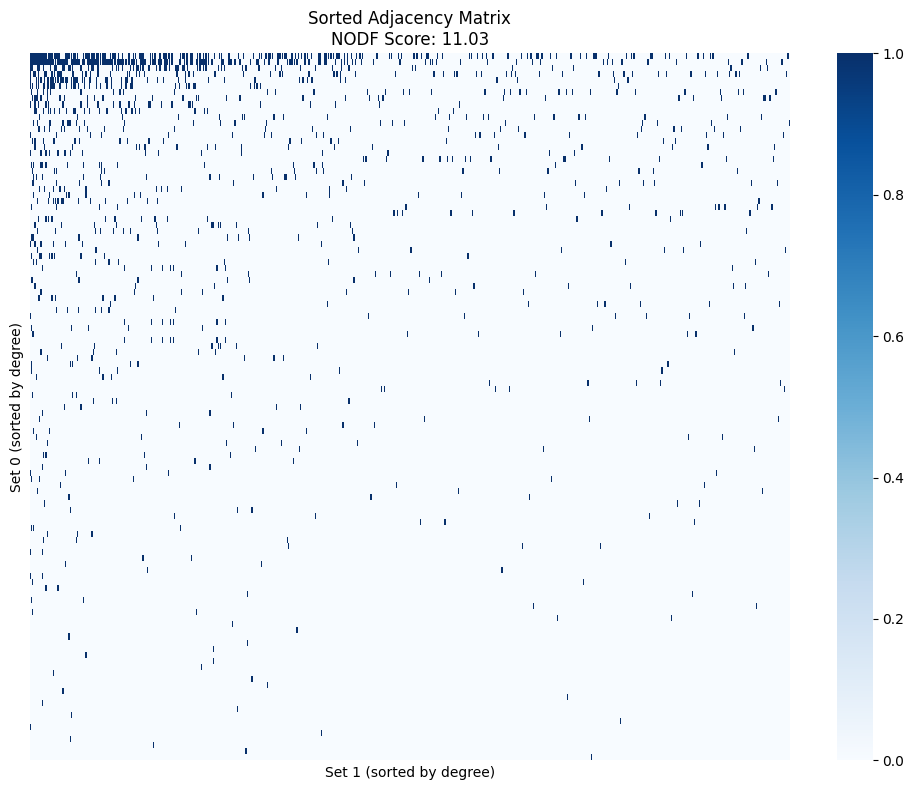

In [7]:
# Nestedness matrix visualization
plt.figure(figsize=(10, 8))
visualize_nestedness_matrix(network_analysis['nestedness'])

# @note the matrix is sparse, if we remove less connected nodes maybe nestedness will be biger
# or simply cluster it before and measure in the clusters

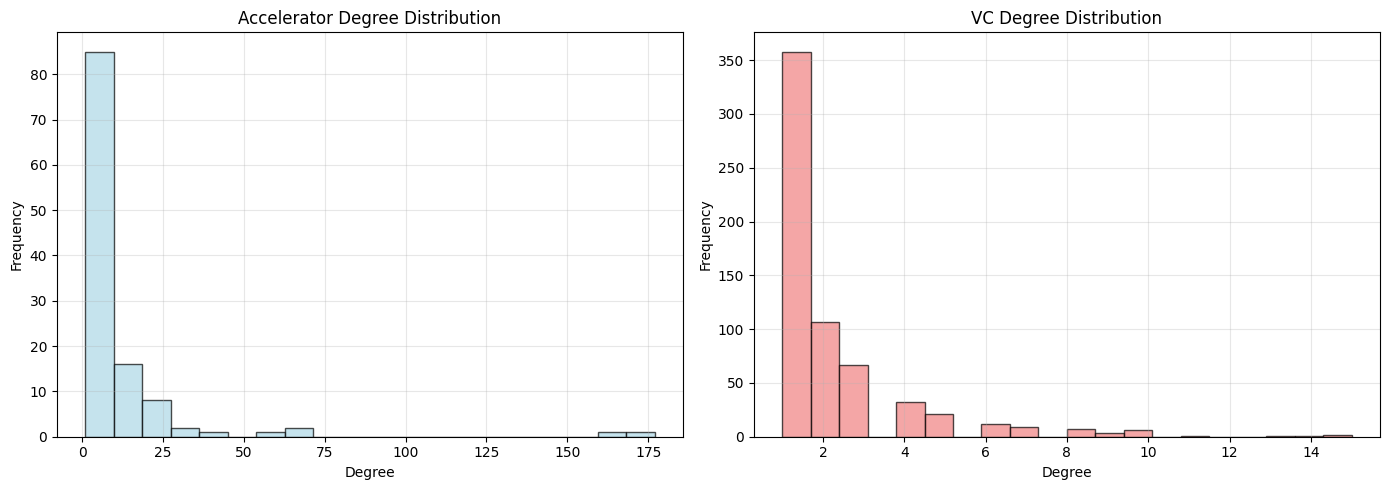

Accelerator degrees: mean=11.6, max=177
VC degrees: mean=2.2, max=15


In [8]:
# Degree distribution analysis
G = network_analysis['graph']
bip_info = is_bipartite_graph(G)
set_0 = bip_info['set_0']  # accelerators
set_1 = bip_info['set_1']  # VCs

degrees_acc = [G.degree(n) for n in set_0]
degrees_vc = [G.degree(n) for n in set_1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accelerator degrees
ax1.hist(degrees_acc, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Accelerator Degree Distribution')
ax1.grid(True, alpha=0.3)

# VC degrees
ax2.hist(degrees_vc, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_title('VC Degree Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Accelerator degrees: mean={np.mean(degrees_acc):.1f}, max={max(degrees_acc)}")
print(f"VC degrees: mean={np.mean(degrees_vc):.1f}, max={max(degrees_vc)}")

## Projection Networks Analysis

Analysis of accelerator and VC projection networks.

In [9]:
# Projection analysis -> transforms bipartite in unipartite
# we connect nodes that share neighbors -> weak connections
projections = network_analysis['projections']
acc_proj = projections['projection_0']
vc_proj = projections['projection_1']

print("=== Projection Networks ===")
print(f"Accelerator projection: {acc_proj.number_of_nodes()} nodes, {acc_proj.number_of_edges()} edges")
print(f"VC projection: {vc_proj.number_of_nodes()} nodes, {vc_proj.number_of_edges()} edges")

# Projection densities
acc_density = nx.density(acc_proj)
vc_density = nx.density(vc_proj)

print(f"Accelerator projection density: {acc_density:.3f}")
print(f"VC projection density: {vc_density:.3f}")

=== Projection Networks ===
Accelerator projection: 117 nodes, 909 edges
VC projection: 627 nodes, 33502 edges
Accelerator projection density: 0.134
VC projection density: 0.171


## Key Actors Analysis

Identification of central accelerators and VCs in the network.

In [10]:
# Top accelerators and VCs by degree
acc_degrees = [(n, G.degree(n)) for n in set_0]
vc_degrees = [(n, G.degree(n)) for n in set_1]

acc_degrees.sort(key=lambda x: x[1], reverse=True)
vc_degrees.sort(key=lambda x: x[1], reverse=True)

print("=== Top 10 Accelerators by Degree ===")
for name, degree in acc_degrees[:10]:
    print(f"{name}: {degree} connections")

print("\n=== Top 10 VCs by Degree ===")
for name, degree in vc_degrees[:10]:
    print(f"{name}: {degree} connections")

=== Top 10 Accelerators by Degree ===
AGORANOV_Accelerators: 177 connections
WILCO_Accelerators: 166 connections
Crédit Agricole_Accelerators: 69 connections
The Family_Accelerators: 66 connections
SAP.iO_Accelerators: 56 connections
BOOST Programs_Accelerators: 41 connections
Incubateur Impulse_Accelerators: 34 connections
NUMA_Accelerators: 32 connections
Microsoft Accelerator Paris_Accelerators: 26 connections
Bpifrance Digital Venture_Accelerators: 25 connections

=== Top 10 VCs by Degree ===
European Innovation Council_VCs: 15 connections
Elaia_VCs: 15 connections
Omnes Capital_VCs: 14 connections
Seventure Partners_VCs: 13 connections
Alven_VCs: 11 connections
CapHorn Invest_VCs: 10 connections
Supernova Invest_VCs: 10 connections
Partech_VCs: 10 connections
SOSV_VCs: 10 connections
Starquest Capital_VCs: 10 connections


## Network Report

Comprehensive summary for comparative analysis with other ecosystems.

In [ ]:
# Generate comprehensive report
network_report = {
    'dataset': 'French Startup Ecosystem',
    'analysis_date': '2025-07-21',
    'network_size': {
        'total_nodes': basic_metrics['num_nodes'],
        'accelerators': basic_metrics['set_0_size'],
        'vcs': basic_metrics['set_1_size'],
        'total_edges': basic_metrics['num_edges']
    },
    'structural_metrics': {
        'density': basic_metrics['density'],
        'connectance': ecological_summary['connectance'],
        'components': basic_metrics['num_components'],
        'largest_component_size': basic_metrics['largest_component_size']
    },
    'ecological_metrics': {
        'nestedness_nodf': ecological_summary['nestedness_nodf'],
        'modularity': ecological_summary['modularity'],
        'cross_assortativity': ecological_summary['cross_assortativity']
    },
    'degree_statistics': {
        'acc_mean_degree': np.mean(degrees_acc),
        'acc_max_degree': max(degrees_acc),
        'vc_mean_degree': np.mean(degrees_vc),
        'vc_max_degree': max(degrees_vc)
    },
    'ecological_interpretation': ecology_summary,
    'top_actors': {
        'top_accelerators': [{'name': name, 'degree': degree} for name, degree in acc_degrees[:5]],
        'top_vcs': [{'name': name, 'degree': degree} for name, degree in vc_degrees[:5]]
    }
}

print(f"Analysis Date: {network_report['analysis_date']}")
print(f"Dataset: {network_report['dataset']}")

print("\n--- Network Structure ---")
ns = network_report['network_size']
print(f"Total nodes: {ns['total_nodes']} ({ns['accelerators']} accelerators + {ns['vcs']} VCs)")
print(f"Total edges: {ns['total_edges']}")

print("\n--- Key Metrics ---")
sm = network_report['structural_metrics']
em = network_report['ecological_metrics']
print(f"Density: {sm['density']:.3f}")
print(f"Connectance: {sm['connectance']:.3f}")
print(f"Nestedness (NODF): {em['nestedness_nodf']:.1f}")
print(f"Modularity: {em['modularity']:.3f}")
print(f"Cross-assortativity: {em['cross_assortativity']:.3f}")

print("\n--- Ecological Classification ---")
ei = network_report['ecological_interpretation']
print(f"Network Type: {ei['network_type']}")
print(f"Resilience Pattern: {ei['resilience_prediction']}")

Analysis Date: 2025-07-21
Dataset: French Startup Ecosystem

--- Network Structure ---
Total nodes: 744 (117 accelerators + 627 VCs)
Total edges: 1352

--- Key Metrics ---
Density: 0.018
Connectance: 0.018
Nestedness (NODF): 11.0
Modularity: 0.302
Cross-assortativity: -0.056

--- Ecological Classification ---
Network Type: Modular (compartmentalized)
Resilience Pattern: Variable resilience patterns


In [ ]:
# Save report for future comparisons
import json
with open('network_report_2025.json', 'w') as f:
    json.dump(network_report, f, indent=2, default=str)

print("Network report saved to 'network_report_2025.json'")
print("Ready for comparative analysis with other datasets.")

French network report saved to 'french_network_report_2025.json'
Ready for comparative analysis with other datasets.
